In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Importing Book Data
books = pd.read_csv('new_books.csv')
print("Columns: ", list(books.columns))
books=books.drop(columns=['Unnamed: 0'])
books.head()

Columns:  ['Unnamed: 0', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


<ipython-input-41-c46b3c413a54>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('new_books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
## Checking for null values
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


In [ ]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [ ]:
books.at[128890,'Publisher']= 'Other'
books.at[129037,'Publisher']= 'Other'

books.at[118033,'Book-Author']= 'Other'
books.at[187689,'Book-Author']= 'Other'

In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
#for displaying full content not in form of .....
pd.set_option('display.max_colwidth', None)

In [ ]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'


books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [ ]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [ ]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1806, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1920, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2026, 2030, 2038, 2050]


In [ ]:
## Replacing Invalid years with max year
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [ ]:
books.loc[books['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [ ]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [ ]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True)

#this is for after removing dulipcates there might have gap
books.reset_index(drop = True, inplace = True)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223844 entries, 0 to 223843
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 223844 non-null  object
 1   Book-Title           223844 non-null  object
 2   Book-Author          223844 non-null  object
 3   Year-Of-Publication  223844 non-null  int64 
 4   Publisher            223844 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.5+ MB


In [ ]:
books.head()
#print(books.shape)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
# Save the preprocessed DataFrame to a CSV file
# books.to_csv('preprocessed_data_book.csv', index=False)


### User Data Preprocessing

In [ ]:
# Importing User Data
users = pd.read_csv('new_users.csv')
users=users.drop(columns=['Unnamed: 0'])
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize = (150,30))
# sns.countplot(x = 'Age', data = users)

In [ ]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 106.0, 108.0, 110.0, 114.0, 115.0, 116.0, 119.0, 123.0, 124.0, 128.0, 132.0, 133.0, 136.0, 137.0, 141.0, 147.0, 148.0, 151.0, 152.0, 156.0, 159.0, 162.0, 168.0, 172.0, 175.0, 186.0, 199.0, 200.0, 201.0, 209.0, 210.0, 212.0, 219.0, 226.0, 230.0, 231.0, 237.0, 239.0, 244.0]


In [ ]:
# Removing Unwanted Age Rows
for index, row in users.iterrows():
    # Condition to check (e.g., remove rows where Age is less than 18)
    if row['Age'] > 80 or row['Age'] < 12:
        users.drop(index, inplace=True)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize = (150,30))
# sns.countplot(x = 'Age', data = users)

In [ ]:
# Checking For Null Columns
column_nan_count = users.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
User-ID         0
Location        0
Age         66402
dtype: int64


In [ ]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]


In [ ]:
# Filling Null Values of 'Age' Column
x = int(users["Age"].median())
users["Age"].fillna(x, inplace = True)
# Checking Again
column_nan_count = users.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
User-ID     0
Location    0
Age         0
dtype: int64


<ipython-input-65-0a0c96fafbc8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users["Age"].fillna(x, inplace = True)


In [ ]:
print(users.index)
users.reset_index(drop=True, inplace=True)
print(users.columns)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       167675, 167676, 167677, 167678, 167679, 167680, 167681, 167682, 167683,
       167684],
      dtype='int64', length=166562)
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [ ]:
# users.loc[219]

In [ ]:
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries
            state.append('other')
            count_no_state += 1
        else:
            state.append(list_[i][1].lower())

        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())

users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values
print(count_no_state)     #printing the states which didnt have any values

2798
9500


In [ ]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166562 entries, 0 to 166561
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  166562 non-null  int64  
 1   Age      166562 non-null  float64
 2   City     166562 non-null  object 
 3   State    166562 non-null  object 
 4   Country  166562 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [ ]:
users.head()
#print(users.shape)

,User-ID,Age,City,State,Country
0,1,32.0,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,32.0,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,32.0,farnborough,hants,united kingdom


In [ ]:
# Save the preprocessed DataFrame to a CSV file
# users.to_csv('preprocessed_data_users.csv', index=False)


### Ratings Data Processing

In [ ]:
# ratings = pd.read_csv(uis
#     "book-ratings.csv",
#     delimiter=';',
#     encoding='ISO-8859-1',
#     on_bad_lines='skip'
# )

<ipython-input-98-6186e5ed236d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(


In [ ]:
ratings = pd.read_csv('new_ratings1.csv')

In [ ]:
print("Columns: ", list(ratings.columns))

Columns:  ['Unnamed: 0', 'User-ID', 'ISBN', 'Book-Rating']


In [ ]:
ratings=ratings.drop(columns=['Unnamed: 0'])
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725.0,034545104X,0.0
1,276726.0,0155061224,5.0
2,276727.0,0446520802,0.0
3,276729.0,052165615X,3.0
4,276729.0,0521795028,6.0


In [ ]:
# Checking For Null Columns
column_nan_count = ratings.isnull().sum()
print("NaN count per column:")
print(column_nan_count)

NaN count per column:
User-ID        1
ISBN           0
Book-Rating    2
dtype: int64


In [ ]:
# Replace NaN with the median of the column
ratings['Book-Rating'].fillna(ratings['Book-Rating'].median())

,Book-Rating
0,0.0
1,5.0
2,0.0
3,3.0
4,6.0
...,...
1190026,9.0
1190027,0.0
1190028,10.0
1190029,10.0


In [ ]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149777 entries, 0 to 1149776
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149776 non-null  float64
 1   ISBN         1149777 non-null  object 
 2   Book-Rating  1149775 non-null  float64
dtypes: float64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.head()
#print(ratings.shape)

,User-ID,ISBN,Book-Rating
0,276725.0,034545104X,0.0
1,276726.0,0155061224,5.0
2,276727.0,0446520802,0.0
3,276729.0,052165615X,3.0
4,276729.0,0521795028,6.0


In [ ]:
# ratings.to_csv('prepocessed_data.csv', index=False)


# **Merging of all three Tables**

### **Merging Books, Users and Rating Tables in One**

In [ ]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585288 entries, 0 to 585287
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 585288 non-null  object 
 1   Book-Title           585288 non-null  object 
 2   Book-Author          585288 non-null  object 
 3   Year-Of-Publication  585288 non-null  int64  
 4   Publisher            585288 non-null  object 
 5   User-ID              585288 non-null  float64
 6   Book-Rating          585288 non-null  float64
 7   Age                  585288 non-null  float64
 8   City                 585288 non-null  object 
 9   State                585288 non-null  object 
 10  Country              585288 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 49.1+ MB


In [ ]:
## Explicitly Ratings Dataset
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(228625, 11)

In [ ]:
dataset1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,32.0,timmins,ontario,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,32.0,other,other,other
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0,32.0,ottawa,other,other
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0,32.0,kingston,ontario,canada


## **Data Visualization**

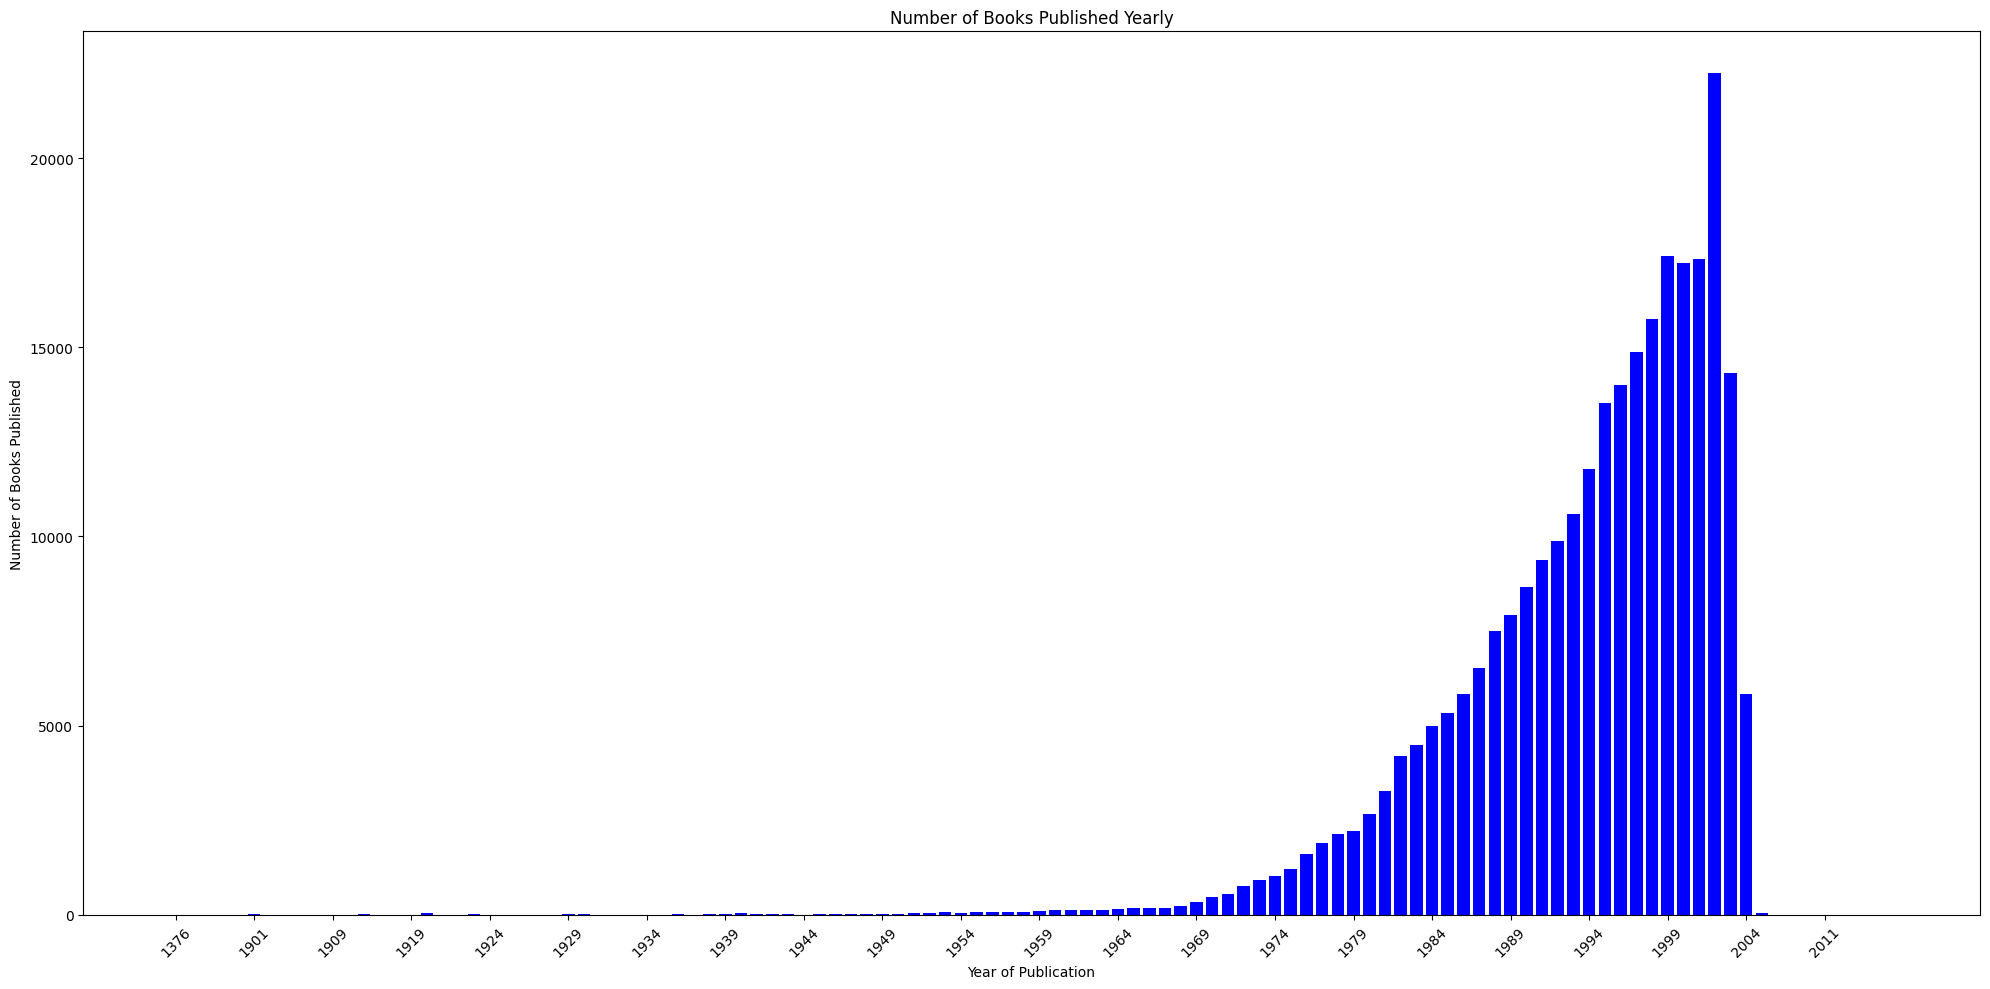

In [ ]:
# Count the number of books per year
publications = books['Year-Of-Publication'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(20, 10))  # Adjust figure size for better visibility
plt.bar(publications.index.astype(str), publications.values, color='blue')

# Label the axes and title
plt.ylabel("Number of Books Published")
plt.xlabel("Year of Publication")
plt.title("Number of Books Published Yearly")

# Show x-axis labels at regular intervals
plt.xticks(ticks=range(0, len(publications.index), 5),  # Show every 5th year
           labels=publications.index[::5].astype(str),  # Select the corresponding year labels
           rotation=45)  # Rotate labels for better visibility

plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


<ipython-input-44-125a6609107d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15],palette="mako")


Text(0.5, 1.0, 'No of books by an author (Top 15)')

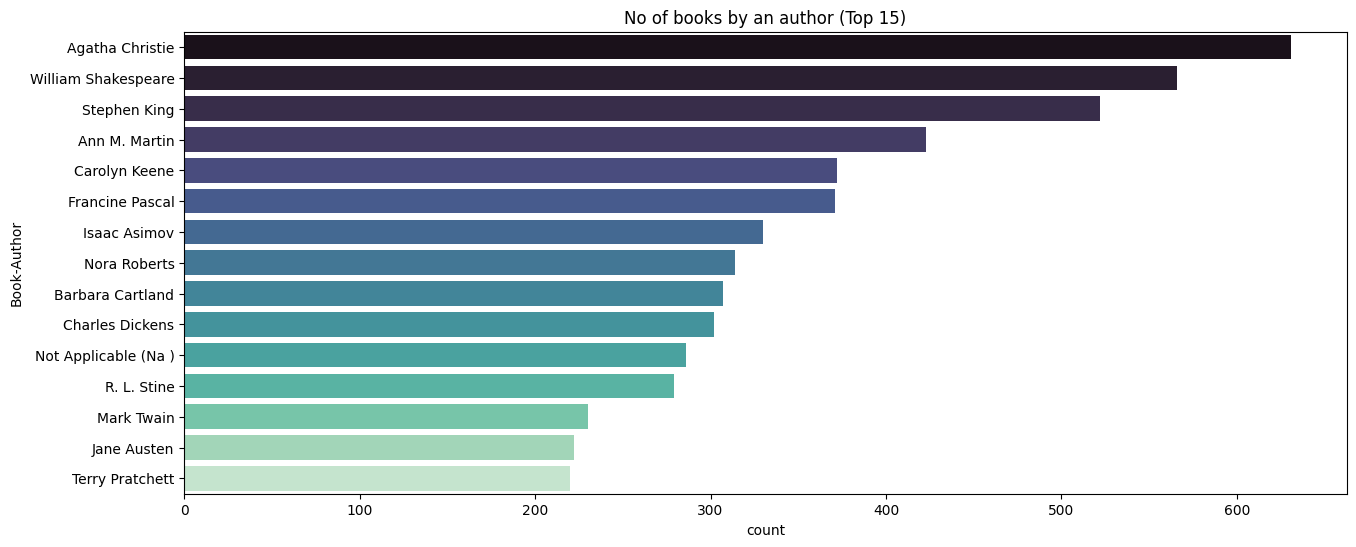

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15],palette="mako")
plt.title("No of books by an author (Top 15)")

<ipython-input-45-153aa26545d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15],palette="colorblind")


Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

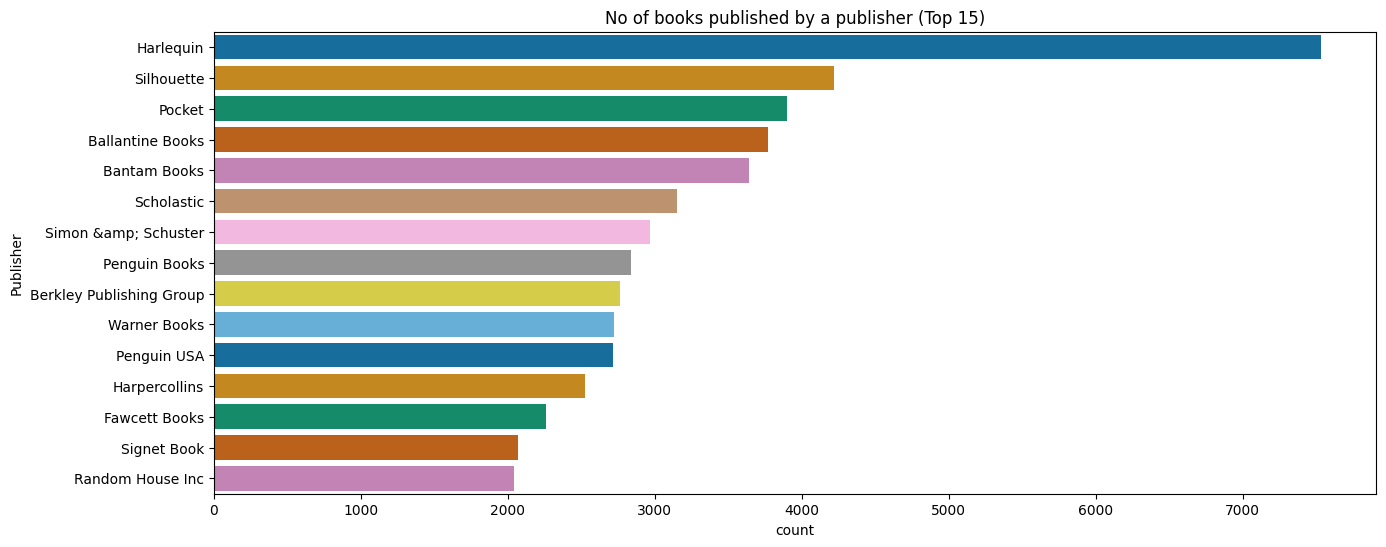

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15],palette="colorblind")
plt.title("No of books published by a publisher (Top 15)")

<ipython-input-46-0b9337cc1852>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=ratings, palette="viridis")


<Axes: xlabel='Book-Rating', ylabel='count'>

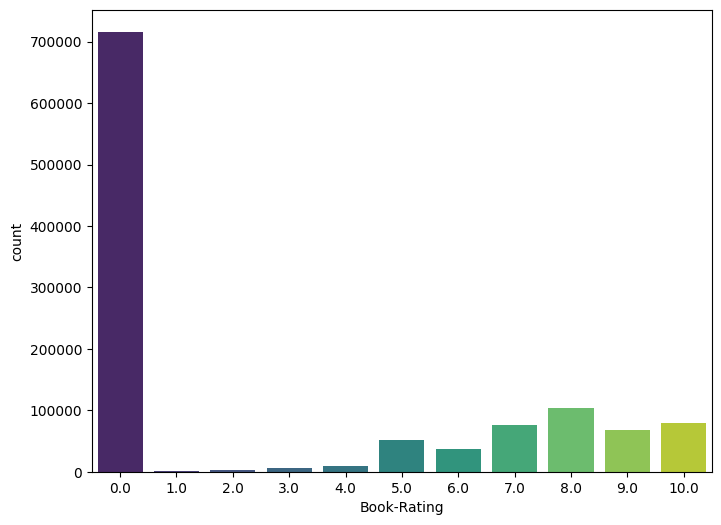

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings, palette="viridis")

<ipython-input-43-7f85cc9e3dd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Book-Rating", data=data,palette="viridis")


<Axes: xlabel='Book-Rating', ylabel='count'>

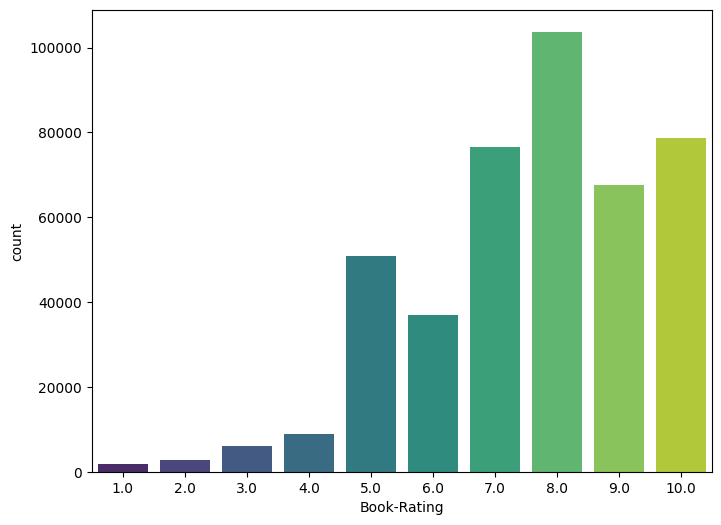

In [ ]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data,palette="viridis")


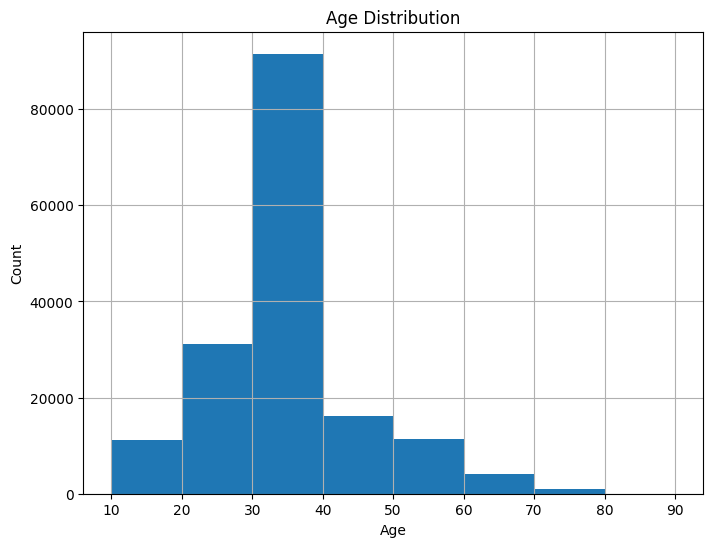

In [ ]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-48-3d9db8366bd5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:15],palette="viridis")


Text(0.5, 1.0, 'No of readers from each city (Top 15)')

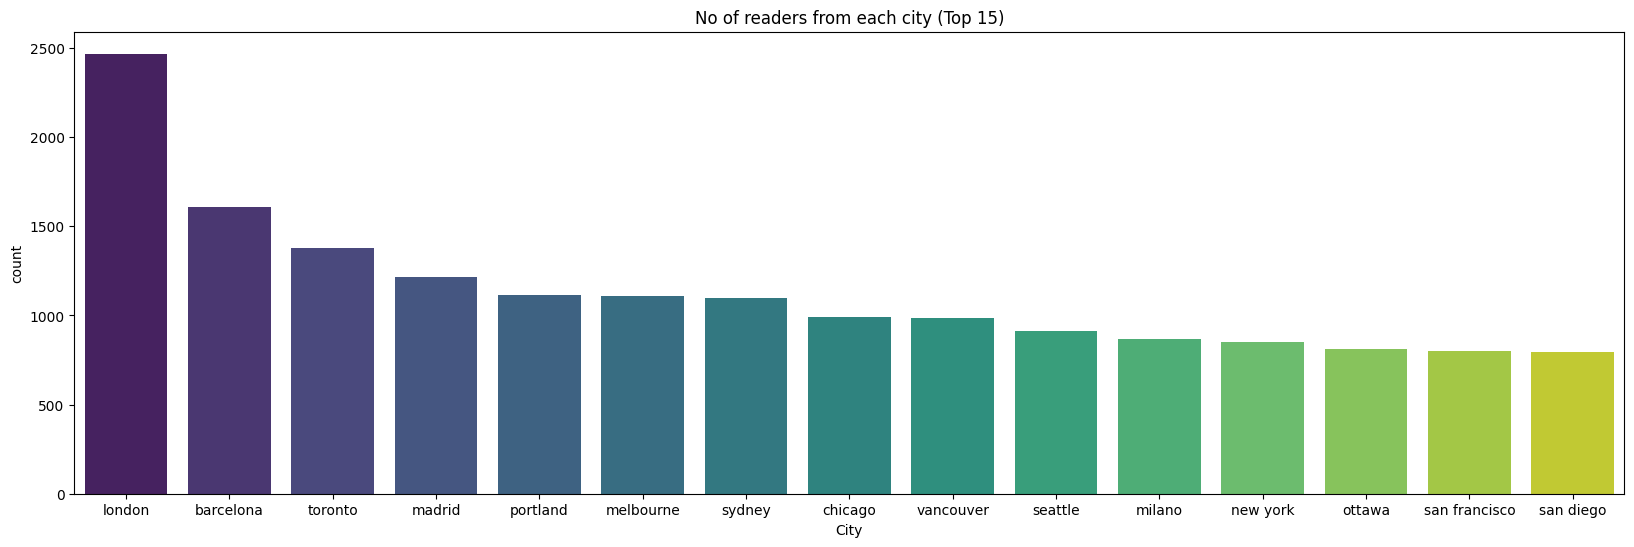

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:15],palette="viridis")
plt.title("No of readers from each city (Top 15)")

<ipython-input-50-25959b3ddfd5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=users,order=users['State'].value_counts().index[0:15],palette="viridis")


Text(0.5, 1.0, 'No of readers from each state (Top 15)')

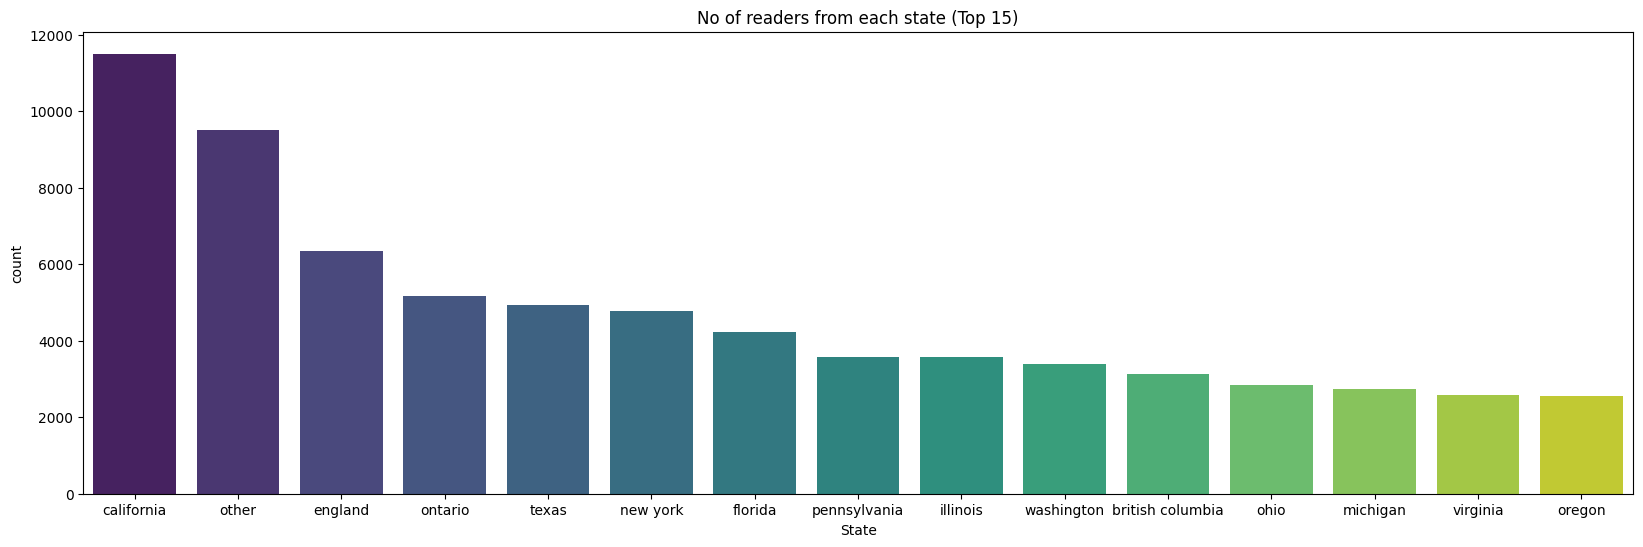

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=users,order=users['State'].value_counts().index[0:15],palette="viridis")
plt.title("No of readers from each state (Top 15)")

<ipython-input-51-1be13a5d5b75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10],palette="bright")


Text(0.5, 1.0, 'No of readers from each country (Top 10)')

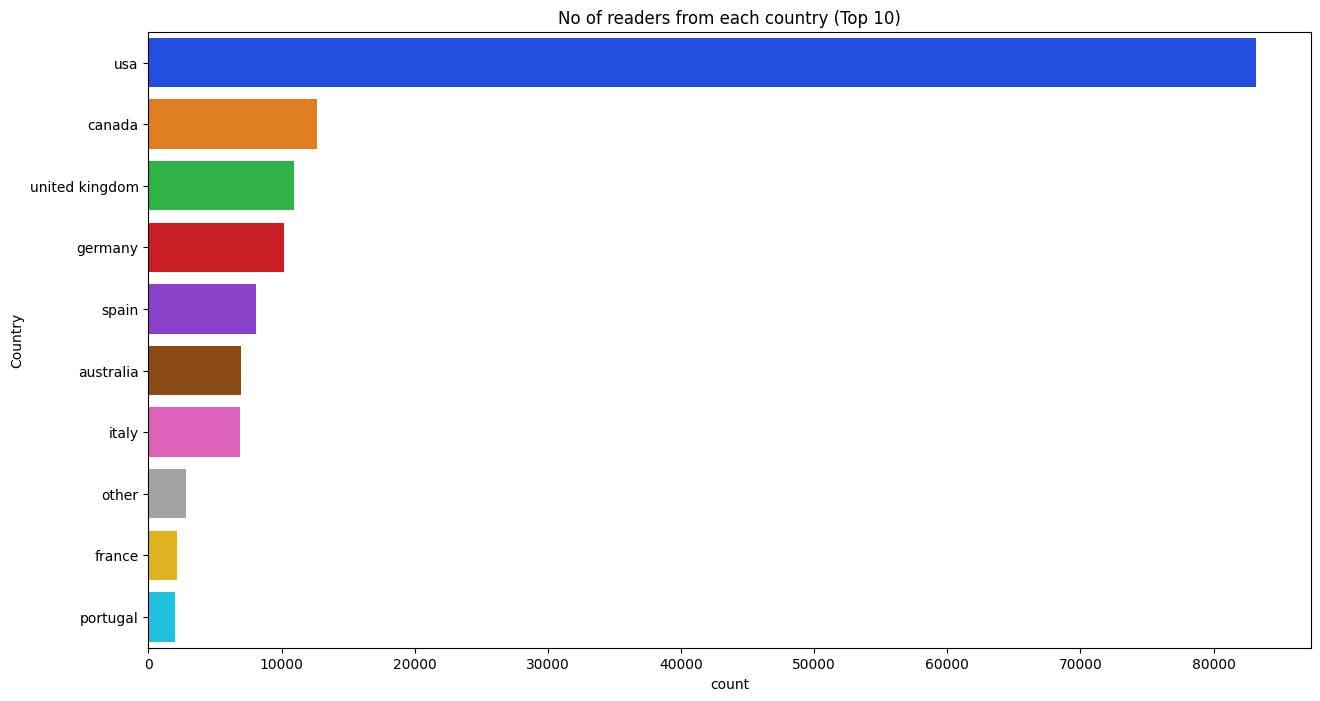

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10],palette="bright")
plt.title("No of readers from each country (Top 10)")

<ipython-input-52-97f5686a797f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=data,order=data['State'].value_counts().index[0:15], palette="tab10")


Text(0.5, 1.0, 'No of readers from states of USA (Top 15)')

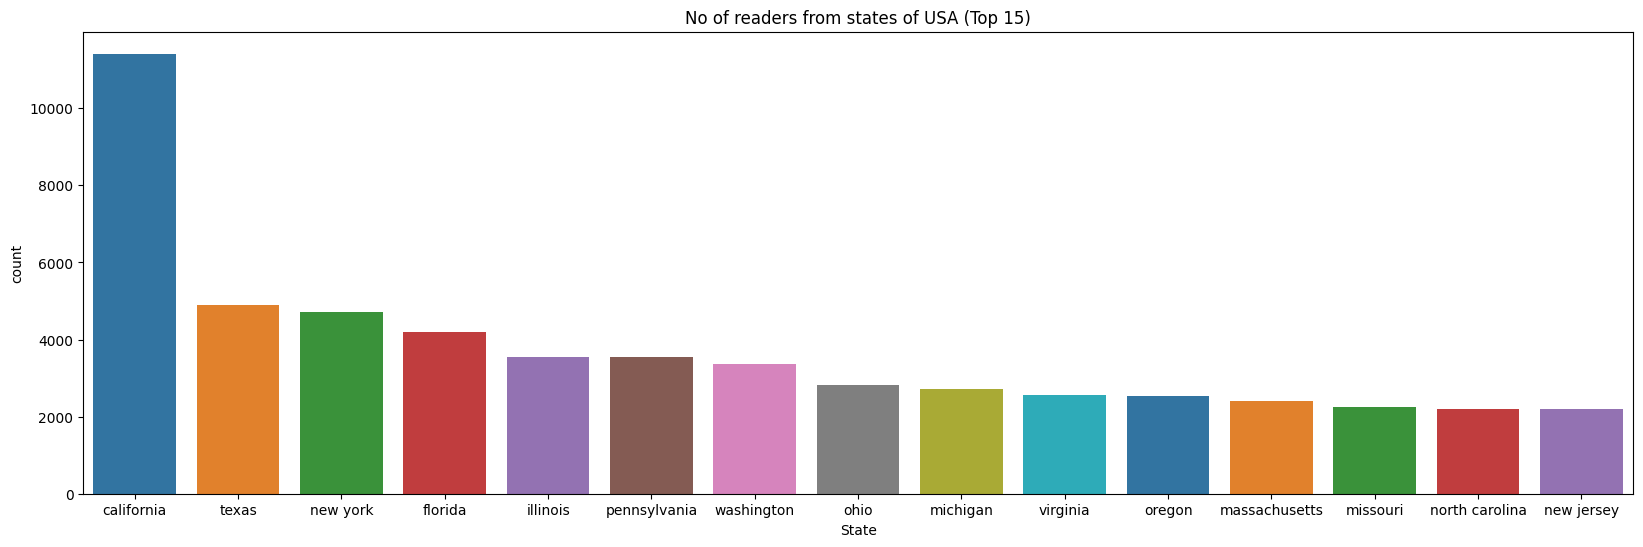

In [ ]:
data=users[users['Country']=='usa']
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=data,order=data['State'].value_counts().index[0:15], palette="tab10")
plt.title("No of readers from states of USA (Top 15)")

<ipython-input-53-f492b600797a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:15], palette="Spectral")


Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

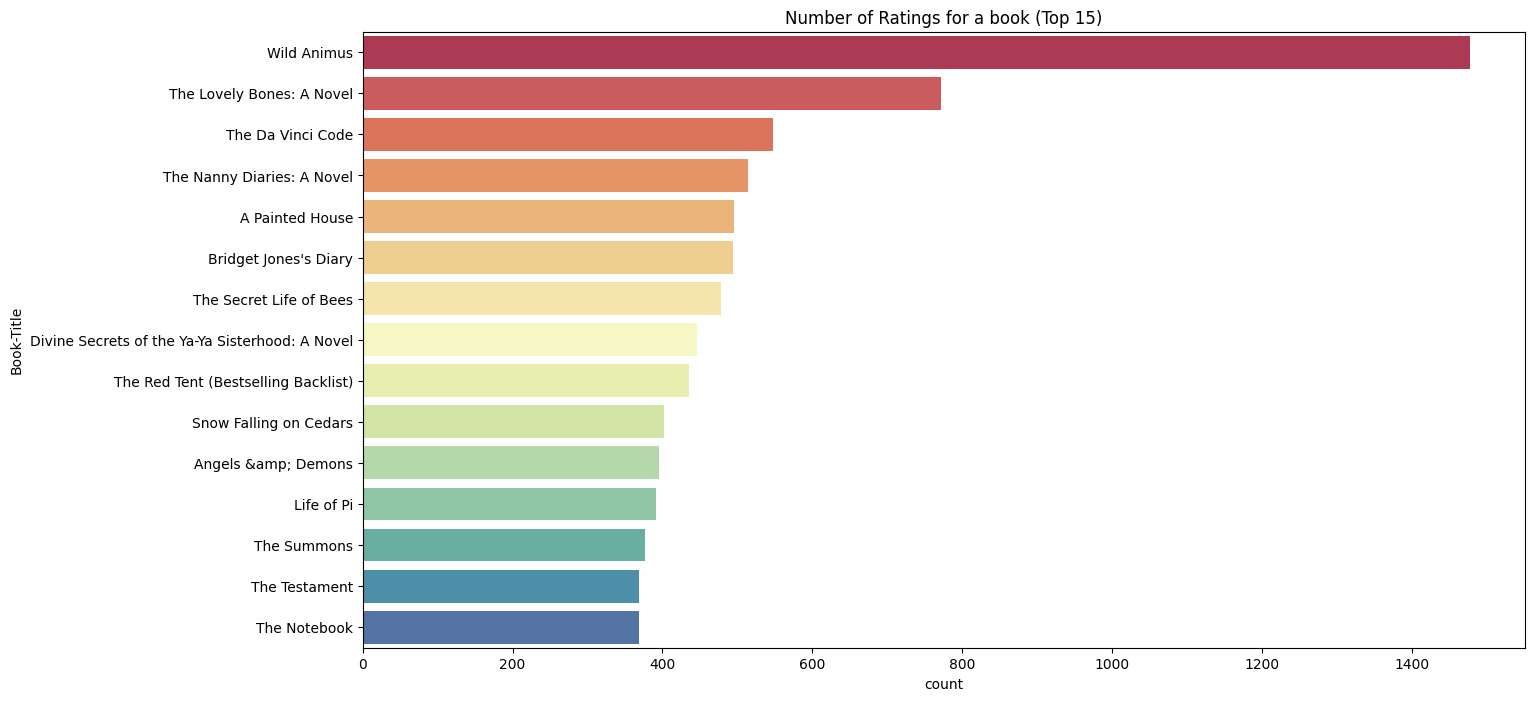

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:15], palette="Spectral")
plt.title("Number of Ratings for a book (Top 15)")

# **Recommendation Systems**

In [ ]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))
# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Enter a book name: Harry Potter and the Sorcerer's Stone (Book 1)
Enter number of books to recommend: 5


### **1. Popularity Based (Top In whole collection)**

In [ ]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN', how = 'inner')
        return result
    return "Invalid number of books entered!!"

In [ ]:
print("Top", number, "Popular books are: ")
popularity_based(dataset1, number)

Top 5 Popular books are: 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,423,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,335,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,293,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,225,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,198,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


### **2. Popularity Based (Top In a given place)**

In [ ]:
def search_unique_places(dataframe, place):
    place = place.lower()

    if place in list(dataframe['City'].unique()):
        return dataframe[dataframe['City'] == place]
    elif place in list(dataframe['State'].unique()):
        return dataframe[dataframe['State'] == place]
    elif place in list(dataframe['Country'].unique()):
        return dataframe[dataframe['Country'] == place]
    else:
        return "Invalid Entry"

In [ ]:
place = input("Enter the name of place: ")
data = search_unique_places(dataset1, place)

if isinstance(data, pd.DataFrame):
    data = popularity_based(data, number)

data

Enter the name of place: new york


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0385486804,4,Into the Wild,Jon Krakauer,1997,Anchor
1,0020198817,3,The GREAT GATSBY (A Scribner Classic),F. Scott Fitzgerald,1992,Scribner Paper Fiction
2,0060921145,3,Animal Dreams,Barbara Kingsolver,1991,Perennial
3,044023722X,3,A Painted House,John Grisham,2001,Dell Publishing Company
4,0316601950,3,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books


### **3. Books by same author, publisher of given book name**

In [ ]:
def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [ ]:
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['Book-Author'].unique()

    data = dataset1[dataset1['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

In [ ]:
if bookName in list(dataset1['Book-Title'].unique()):
    d = dataset1[dataset1['Book-Title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!")


Books by same Author:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter y el cÃ¡liz de fuego
Fantastic Beasts and Where to Find Them


Books by same Publisher:

The Case of Hermie the Missing Hamster (A Jigsaw Jones Mystery, No 1)
The Adventures of Super Diaper Baby: The First Graphic Novel
Through the Hidden Door
Fraidy Cats (Hello Reader, Level 2)
Taking Chances (Heartland (Scholastic Paperback))


### **Collaborative Filtering (User-Item Filtering)**

**Selecting books with total ratings equals to or more than 50**

In [ ]:
# Step 1: Generate value counts
df = dataset1['Book-Title'].value_counts().reset_index()
df.columns = ['Book-Title', 'Total-Ratings']

# Step 2: Ensure 'Book-Title' in both DataFrames is a string
df['Book-Title'] = df['Book-Title'].astype(str)
dataset1['Book-Title'] = dataset1['Book-Title'].astype(str)


df = dataset1.merge(df, on='Book-Title', how='inner')

df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

### **User - Item Collaborative Filtering**

In [ ]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
def printBookDetails(bookID):
    print(dataset1[dataset1['ISBN']==bookID]['Book-Title'].values[0])

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)

    print("\nRECOMMENDATIONS:\n")

    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [ ]:
k = list(dataset1['Book-Title'])
m = list(dataset1['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Book 1)

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
The Return of the King (The Lord of the Rings, Part 3)
A Painted House


### **Nearest Neighbours Based**

In [ ]:
from sklearn.neighbors import NearestNeighbors
data = (dataset1.groupby('Book-Title')['Book-Rating']
        .sum()
        .reset_index()
        .rename(columns={'Book-Rating': 'Total-Rating'}))

# Filter books based on popularity threshold
popular_books = data[data['Total-Rating'] >= popularity_threshold]

# Merge back with the original dataset
result = pd.merge(popular_books, dataset1, on='Book-Title')

# Reset index
result = result.reset_index(drop=True)

# Step 2: Create a pivot table
matrix = result.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)

# Step 3: Convert the matrix to a sparse matrix
up_matrix = csr_matrix(matrix)

In [ ]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]])


Recommended books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)
The Hobbit: or There and Back Again


### **CONTENT-BASED FILTERING**

In [ ]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(15717, 6)

In [ ]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(15717, 477)

In [ ]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(15717, 15717)

In [ ]:
print("Recommended Books:\n")
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)
